In [20]:
#PARTITION: SCAV GPU
import os

nodes_total = 209
cpu_total = 3528
memory_total = 22309446

hourly_cpu_values = {}
hourly_cpu_values["Hour"] = []
hourly_cpu_values["CPUs"] = []
hourly_memory_values = {}
hourly_memory_values["Hour"] = []
hourly_memory_values["Memory"] = []

files = sorted(os.listdir("Final Data/Scavenger-GPU"))
for item in files:
    nodes_hour = 0
    cpu_hour = 0
    memory_hour = 0
    count = 0
    if item!=".ipynb_checkpoints":
        filename = f"Final Data/Scavenger-GPU/{item}"
        with open(filename) as f:
            date_month = int(os.path.basename(item).split("-")[1])
            date_day = int(os.path.basename(item).split("T")[0].split("-")[2])
            date_hour = int(os.path.basename(item).split("T")[1].split(":")[0])
            reader = f.readlines()
            for row in reader:
                values = row.split("|")
                start_date = values[3]
                end_date = values[4]
                if start_date!="None" and (int(start_date.split("T")[0].split("-")[2])<date_day or ((int(start_date.split("T")[0].split("-")[2])==date_day) and (int(start_date.split("T")[1].split(":")[0])<date_hour+1))) and int(start_date.split("T")[0].split("-")[1])<=date_month:
                    if end_date != "Unknown" and int(end_date.split("T")[0].split("-")[2])==date_day and int(end_date.split("T")[1].split(":")[0])<date_hour+1:
                        continue
                    else:
                        if "G" in values[9]:
                            memory_hour += float(values[9].split("G")[0])*1000
                            cpu_hour += float(values[8])
                            continue
                        else:
                            memory_hour += float(values[9].split("M")[0])
                            cpu_hour += float(values[8])
                            continue
        hourly_cpu_values["Hour"].append(item.split(".")[0])
        hourly_cpu_values["CPUs"].append((cpu_hour/cpu_total)*100)
        hourly_memory_values["Hour"].append(item.split(".")[0])
        hourly_memory_values["Memory"].append((memory_hour/memory_total)*100)
        #print(f"Date and time: {os.path.basename(item)}")
        #print(f"Total %memory used in the last hour = {(memory_hour/memory_total)*100} Mb")
        #print(f"Total %CPUs used in the last hour = {(cpu_hour/cpu_total)*100}")
        #print("")

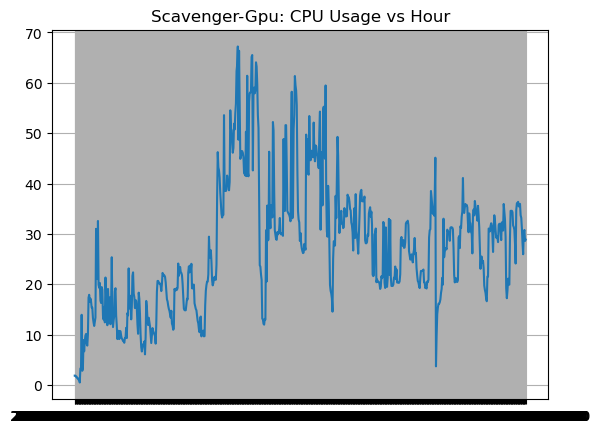

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

dfsgcpu = pd.DataFrame(hourly_cpu_values)
plt.plot(dfsgcpu["Hour"], dfsgcpu["CPUs"])
plt.title("Scavenger-Gpu: CPU Usage vs Hour")
plt.xlabel=("Hour")
plt.ylabel=("% of CPUs Used")
plt.grid(True)
plt.show()


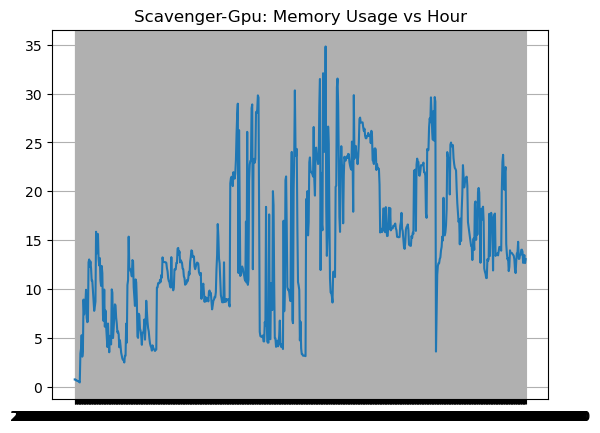

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

dfsgmem = pd.DataFrame(hourly_memory_values)
plt.plot(dfsgmem["Hour"], dfsgmem["Memory"])
plt.title("Scavenger-Gpu: Memory Usage vs Hour")
plt.xlabel=("Hour")
plt.ylabel=("% of Memory Used")
plt.grid(True)
plt.show()

In [15]:
#PARTITION: SCAVENGER
import os

nodes_total = 103
cpu_total = 4520
memory_total = 28497879

hourly_cpu_values = {}
hourly_cpu_values["Hour"] = []
hourly_cpu_values["CPUs"] = []
hourly_memory_values = {}
hourly_memory_values["Hour"] = []
hourly_memory_values["Memory"] = []

files = sorted(os.listdir("Final Data/Scavenger"))
for item in files:
    nodes_hour = 0
    cpu_hour = 0
    memory_hour = 0
    count = 0
    if item!=".ipynb_checkpoints":
        filename = f"Final Data/Scavenger/{item}"
        with open(filename) as f:
            date_month = int(os.path.basename(item).split("-")[1])
            date_day = int(os.path.basename(item).split("T")[0].split("-")[2])
            date_hour = int(os.path.basename(item).split("T")[1].split(":")[0])
            reader = f.readlines()
            for row in reader:
                values = row.split("|")
                start_date = values[3]
                end_date = values[4]
                if start_date!="None" and (int(start_date.split("T")[0].split("-")[2])<date_day or ((int(start_date.split("T")[0].split("-")[2])==date_day) and (int(start_date.split("T")[1].split(":")[0])<date_hour+1))) and int(start_date.split("T")[0].split("-")[1])<=date_month:
                    if end_date != "Unknown" and int(end_date.split("T")[0].split("-")[2])==date_day and int(end_date.split("T")[1].split(":")[0])<date_hour+1:
                        continue
                    else:
                        if "G" in values[9]:
                            memory_hour += float(values[9].split("G")[0])*1000
                            cpu_hour += float(values[8])
                            continue
                        else:
                            memory_hour += float(values[9].split("M")[0])
                            cpu_hour += float(values[8])
                            continue
        hourly_cpu_values["Hour"].append(item.split(".")[0])
        hourly_cpu_values["CPUs"].append((cpu_hour/cpu_total)*100)
        hourly_memory_values["Hour"].append(item.split(".")[0])
        hourly_memory_values["Memory"].append((memory_hour/memory_total)*100)
        #print(f"Date and time: {os.path.basename(item)}")
        #print(f"Total %memory used in the last hour = {(memory_hour/memory_total)*100} Mb")
        #print(f"Total %CPUs used in the last hour = {(cpu_hour/cpu_total)*100}")
        #print("")

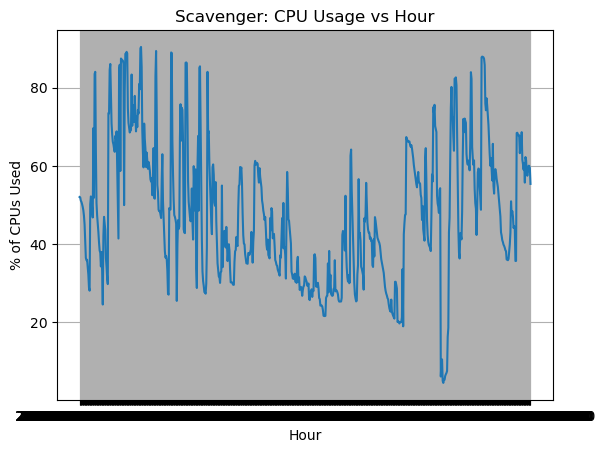

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

dfcpu = pd.DataFrame(hourly_cpu_values)
plt.plot(dfcpu["Hour"], dfcpu["CPUs"])
plt.title("Scavenger: CPU Usage vs Hour")
plt.xlabel("Hour")
plt.ylabel("% of CPUs Used")
plt.grid(True)
plt.show()

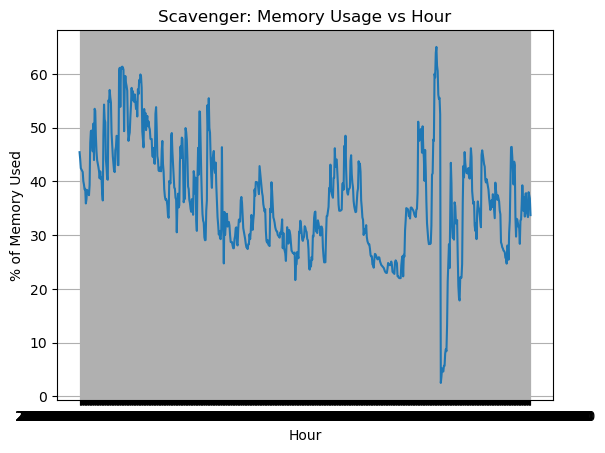

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dfmemory = pd.DataFrame(hourly_memory_values)
plt.plot(dfcpu["Hour"], dfmemory["Memory"])
plt.title("Scavenger: Memory Usage vs Hour")
plt.xlabel("Hour")
plt.ylabel("% of Memory Used")
plt.grid(True)
plt.show()